In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Lambda

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Dense, Dropout, Flatten, Activation
#from tensorflow.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.utils import np_utils
import os
import numpy as np
from tqdm import tqdm 

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
## patch-level internal validation

In [3]:
test_image_path = '/mnt/dgx1/koalary/internal-validation/'

In [4]:
image_list = []
import os
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['controlled']:
                label = 0
            elif nextDir in ['uncontrolled']:
                label = 1
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                image = load_img(temp + '/' + file,target_size=(256,256))
                image = img_to_array(image)
                image /= 255
                X.append(image)
                y.append(label)
                image_list.append(file)   
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [5]:
x_test,y_test = get_data(test_image_path)

100%|██████████| 5026/5026 [03:09<00:00, 26.50it/s]


In [6]:
from tensorflow.keras.utils import to_categorical
Y_test = to_categorical(y_test, 2)

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import efficientnet.tfkeras as efn 
from tensorflow.keras.models import Model, load_model
model_a = load_model('efficientnet_0.001.h5')   # Efficientnet-B5 model with learning rate 0.001
model_b = load_model('efficientnet_0.01.h5')    # Efficientnet-B5 model with learning rate 0.01
model_c = load_model('efficientnet_0.0008.h5')  # Efficientnet-B5 model with learning rate 0.0008
model_d = load_model('inceptionv3.h5')          # Inception-V3 model with learning rate 0.0008
model_e = load_model('resnet50.h5')             # ResNet50 model with learning rate 0.0008

In [8]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi'] = 300
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
Y_pred_a = model_a.predict(x_test)
Y_pred_b = model_b.predict(x_test)
Y_pred_c = model_c.predict(x_test)
Y_pred_d = model_d.predict(x_test)
Y_pred_e = model_e.predict(x_test)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
y_pred_a = np.argmax(Y_pred_a, axis=1)
y_pred_b = np.argmax(Y_pred_b, axis=1)
y_pred_c = np.argmax(Y_pred_c, axis=1)
y_pred_d = np.argmax(Y_pred_d, axis=1)
y_pred_e = np.argmax(Y_pred_e, axis=1)
# Convert true test classes from one hot vectors to labels
y_true = np.argmax(Y_test, axis=1)

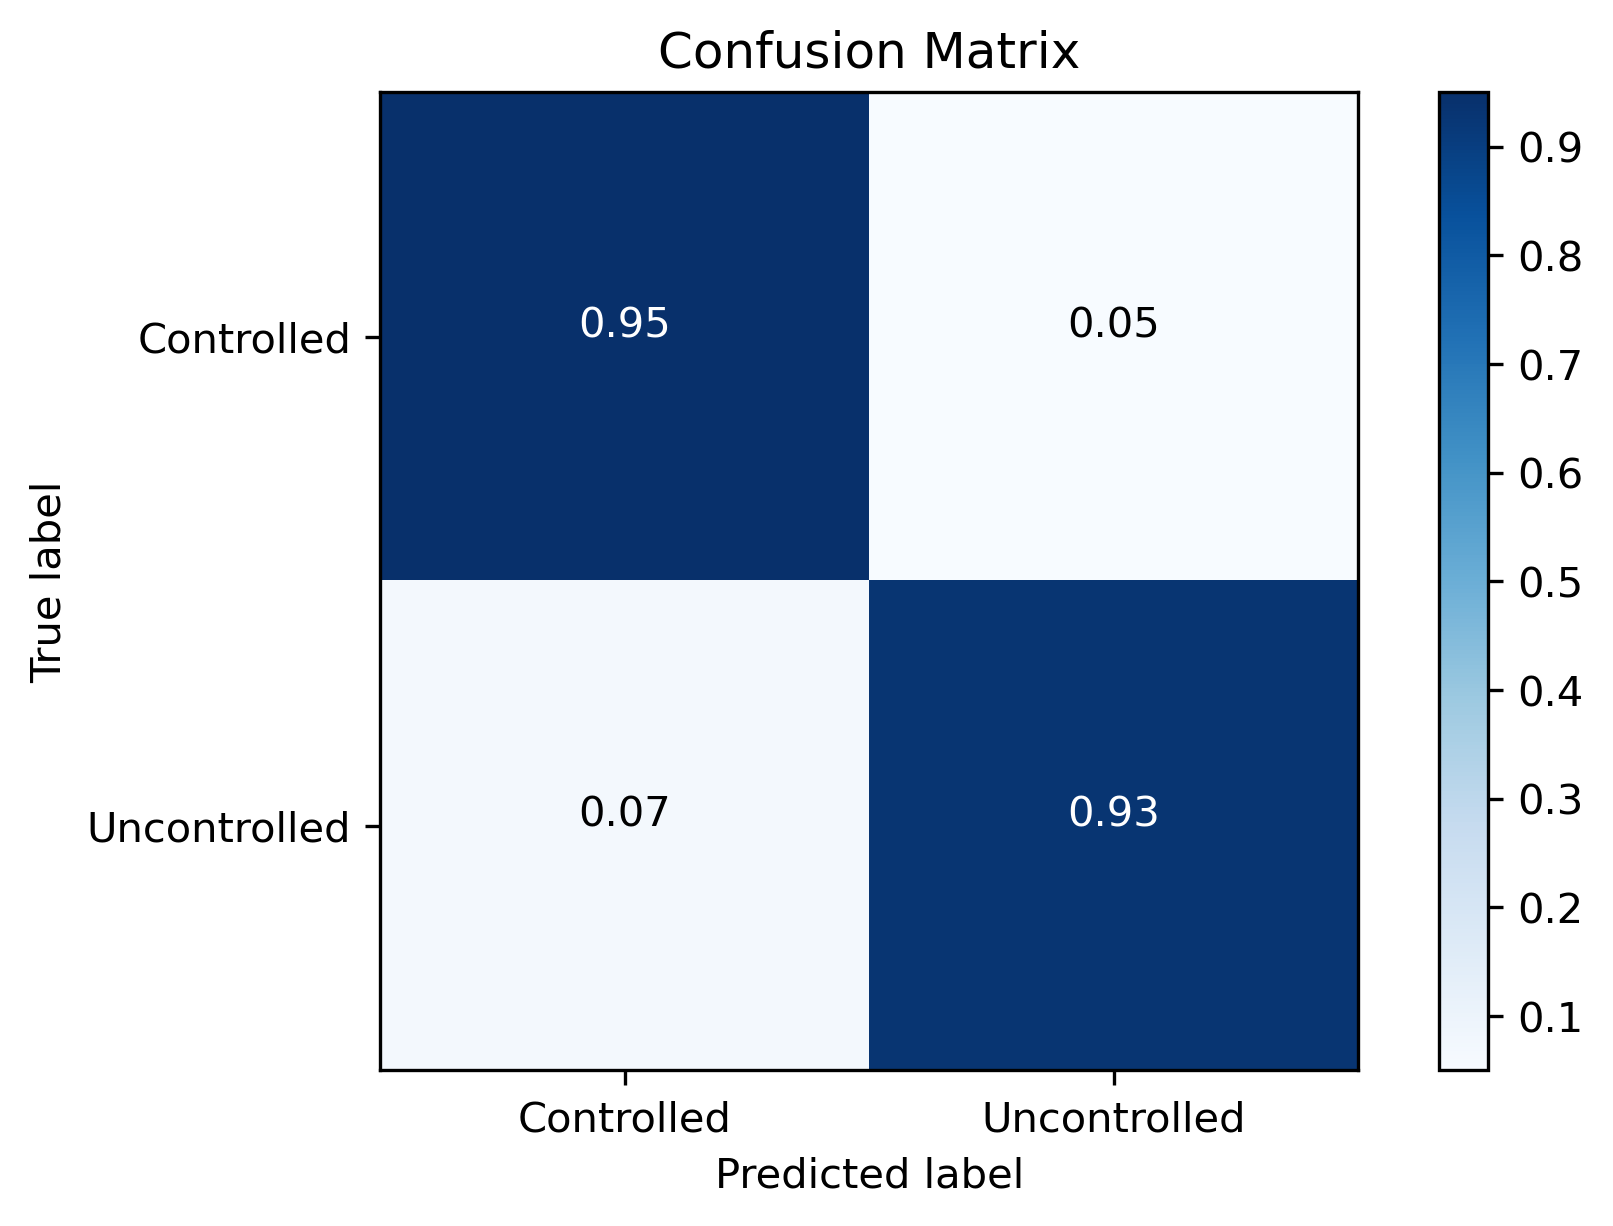

In [10]:
confusion_mtx = confusion_matrix(y_true, y_pred_a)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

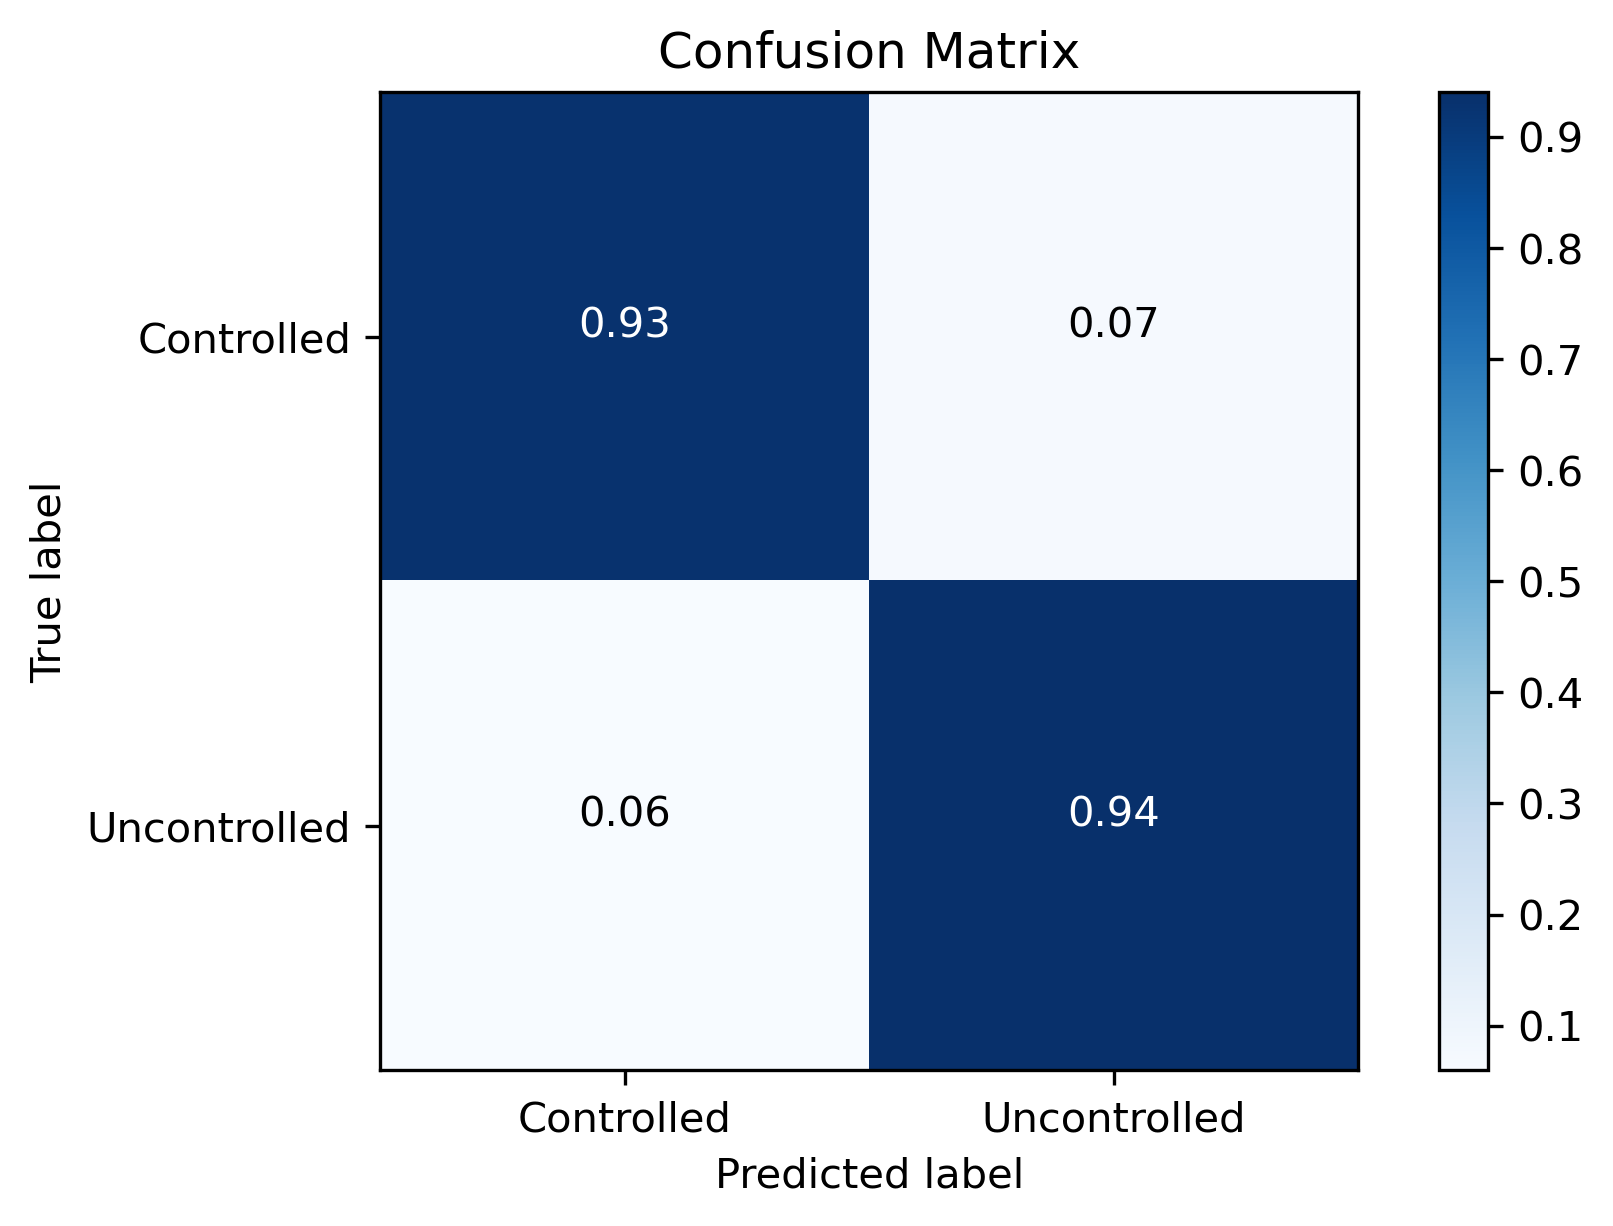

In [11]:
confusion_mtx = confusion_matrix(y_true, y_pred_b)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

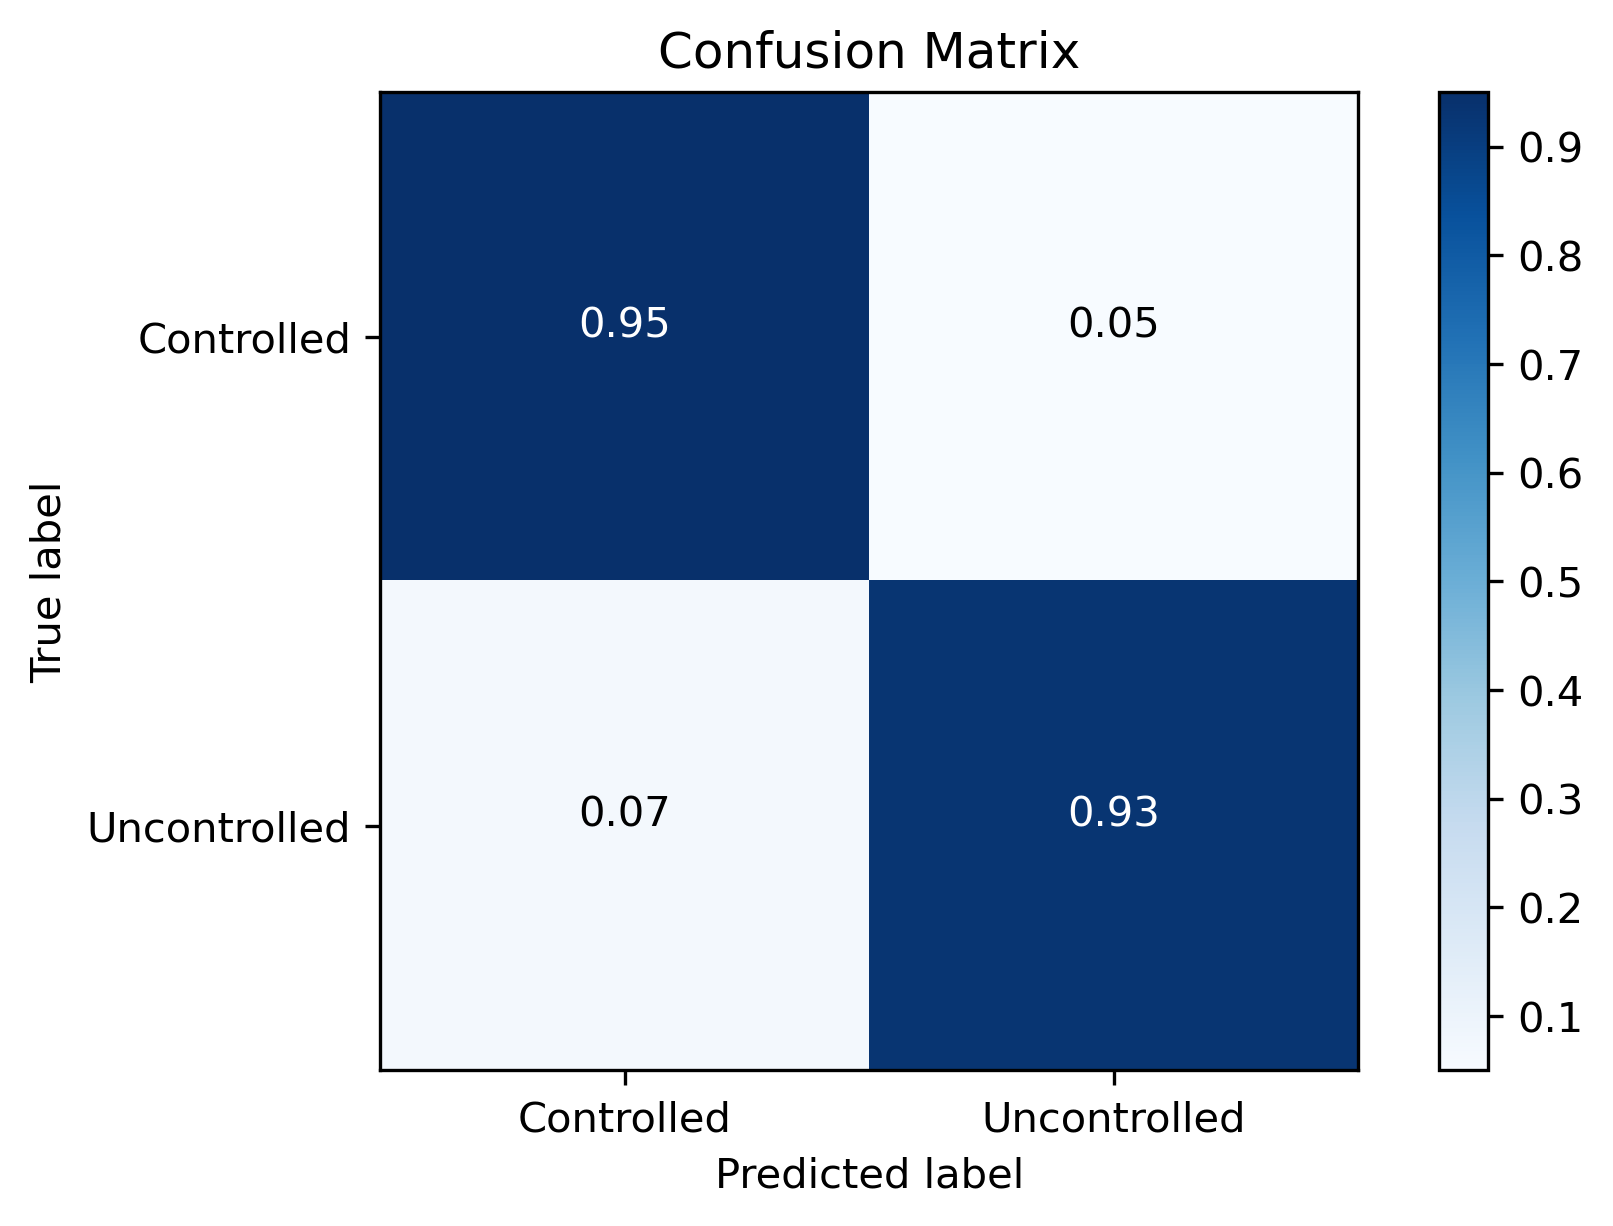

In [12]:
confusion_mtx = confusion_matrix(y_true, y_pred_c)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

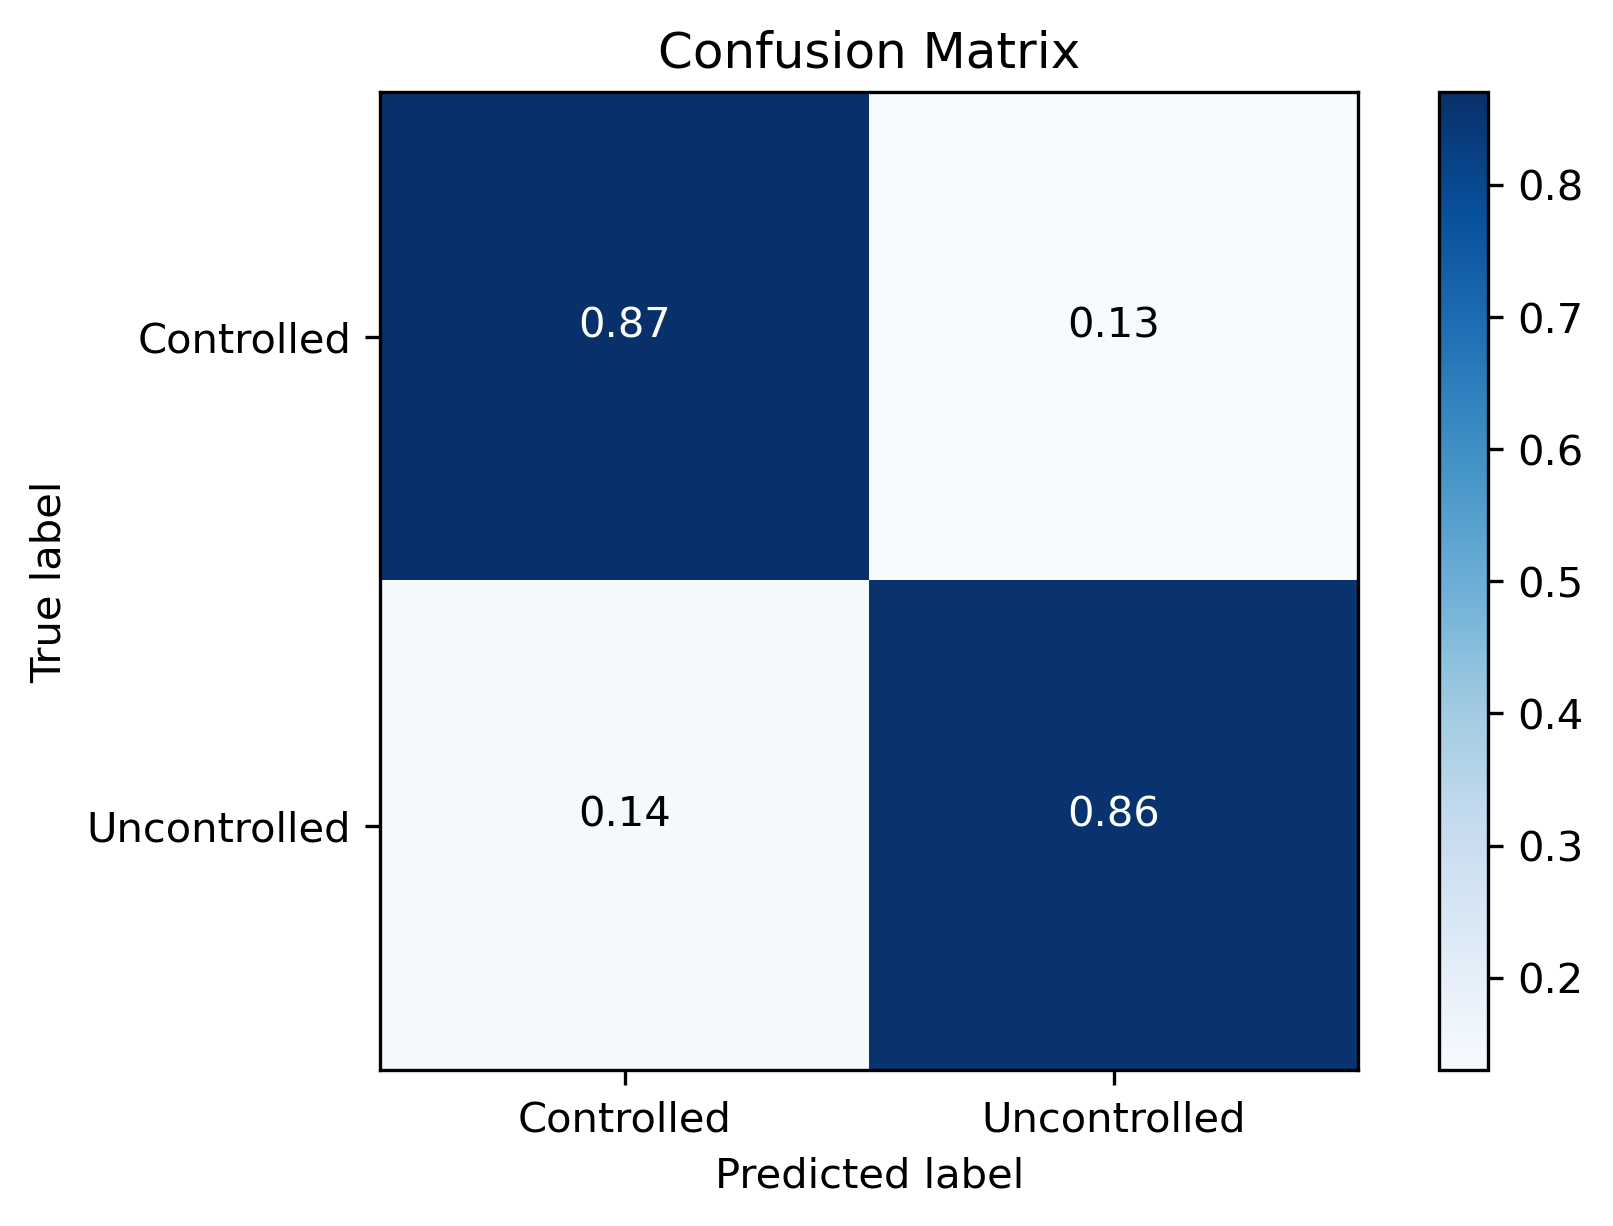

In [13]:
confusion_mtx = confusion_matrix(y_true, y_pred_d)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

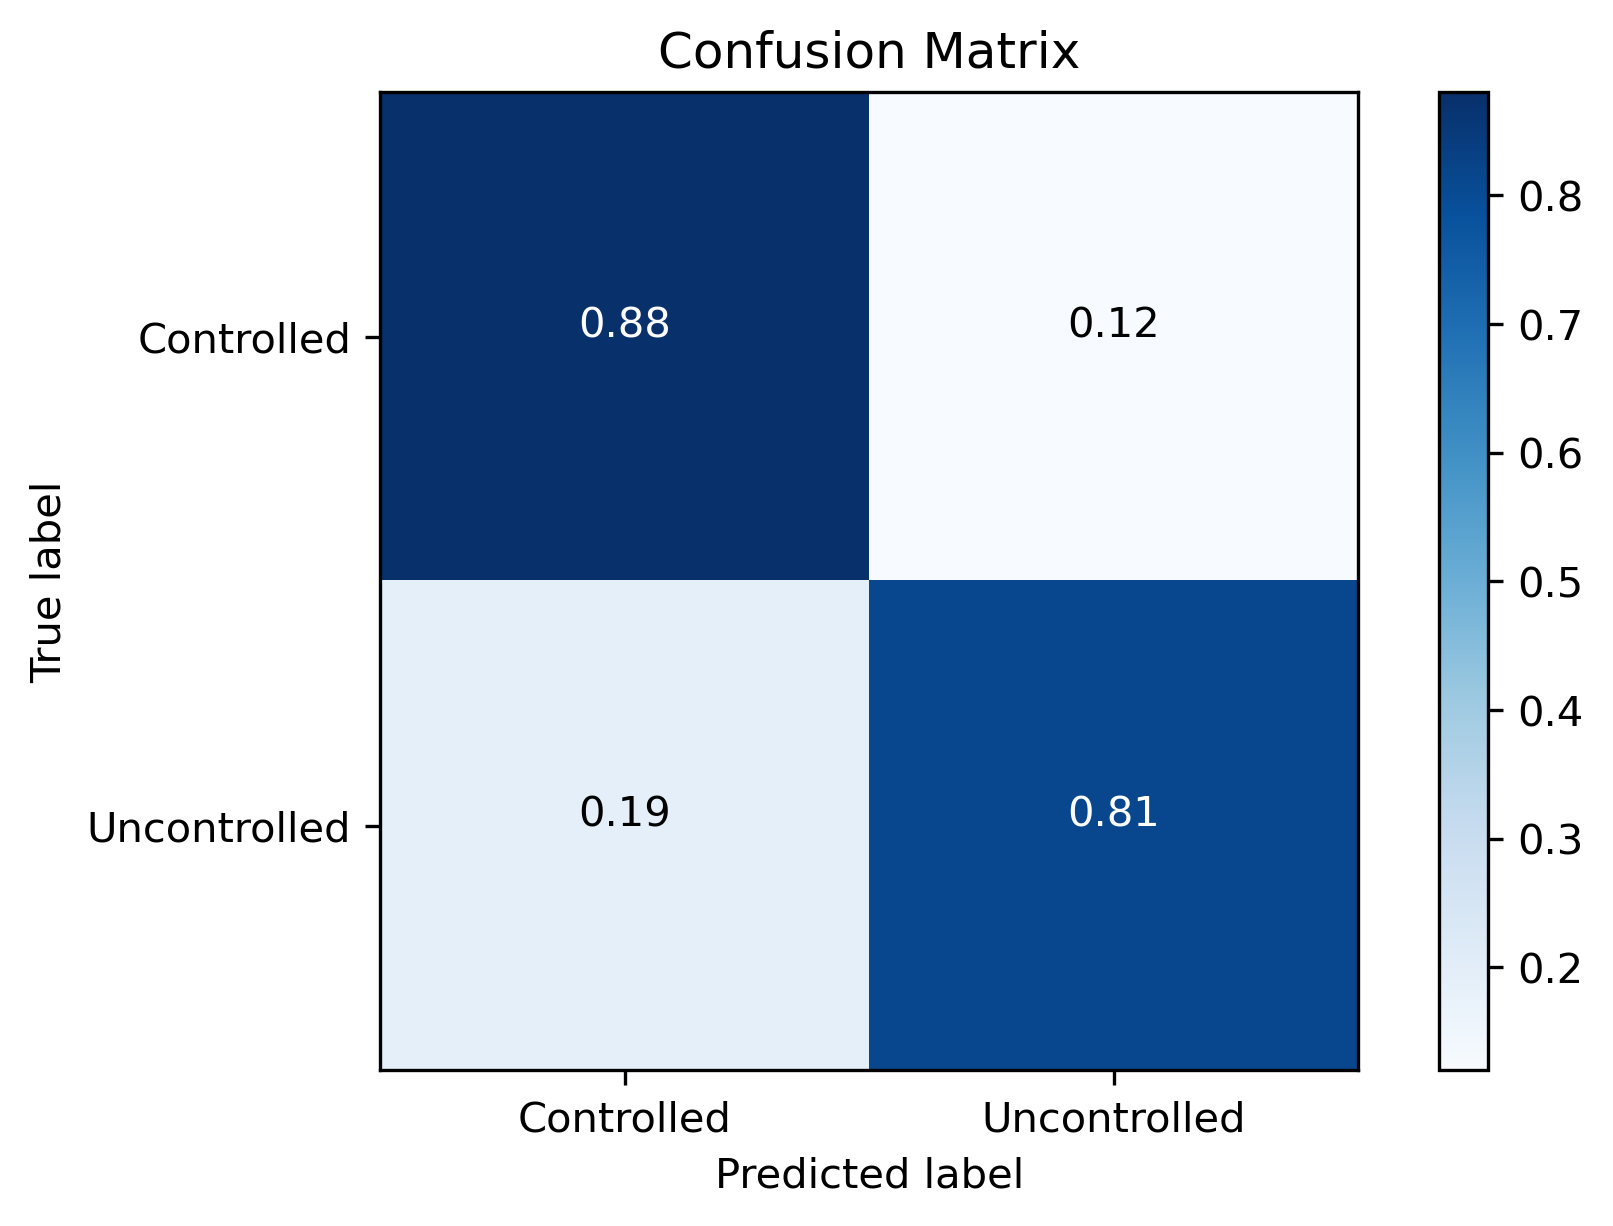

In [14]:
confusion_mtx = confusion_matrix(y_true, y_pred_e)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_a))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_a, tpr_a, thresholds_a = roc_curve(Y_test.ravel(), Y_pred_a.ravel())

# Compute ROC area
roc_auc_a = auc(fpr_a, tpr_a)
print('ROC area is {0}'.format(roc_auc_a))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5091
           1       0.94      0.93      0.94      5026

    accuracy                           0.94     10117
   macro avg       0.94      0.94      0.94     10117
weighted avg       0.94      0.94      0.94     10117

ROC area is 0.9844067955381656


In [16]:
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

mcc_a = matthews_corrcoef(y_true, y_pred_a)
print('mcc is {0}'.format(mcc_a))

mcc is 0.8804313998804267


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_b))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_b, tpr_b, thresholds_b = roc_curve(Y_test.ravel(), Y_pred_b.ravel())

# Compute ROC area
roc_auc_b = auc(fpr_b, tpr_b)
print('ROC area is {0}'.format(roc_auc_b))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5091
           1       0.93      0.94      0.94      5026

    accuracy                           0.94     10117
   macro avg       0.94      0.94      0.94     10117
weighted avg       0.94      0.94      0.94     10117

ROC area is 0.9834813770122153


In [20]:
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

mcc_b = matthews_corrcoef(y_true, y_pred_b)
print('mcc is {0}'.format(mcc_b))

mcc is 0.8756949263205882


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_c))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_c, tpr_c, thresholds_c = roc_curve(Y_test.ravel(), Y_pred_c.ravel())

# Compute ROC area
roc_auc_c = auc(fpr_c, tpr_c)
print('ROC area is {0}'.format(roc_auc_c))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5091
           1       0.94      0.93      0.94      5026

    accuracy                           0.94     10117
   macro avg       0.94      0.94      0.94     10117
weighted avg       0.94      0.94      0.94     10117

ROC area is 0.9844067955381656


In [19]:
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

mcc_c = matthews_corrcoef(y_true, y_pred_c)
print('mcc is {0}'.format(mcc_c))

mcc is 0.8804313998804267


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_d))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_d, tpr_d, thresholds_d = roc_curve(Y_test.ravel(), Y_pred_d.ravel())

# Compute ROC area
roc_auc_d = auc(fpr_d, tpr_d)
print('ROC area is {0}'.format(roc_auc_d))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5091
           1       0.87      0.86      0.86      5026

    accuracy                           0.87     10117
   macro avg       0.87      0.87      0.87     10117
weighted avg       0.87      0.87      0.87     10117

ROC area is 0.9410650504252952


In [21]:
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

mcc_d = matthews_corrcoef(y_true, y_pred_d)
print('mcc is {0}'.format(mcc_d))

mcc is 0.7321227172363958


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_e))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_e, tpr_e, thresholds_e = roc_curve(Y_test.ravel(), Y_pred_e.ravel())

# Compute ROC area
roc_auc_e = auc(fpr_e, tpr_e)
print('ROC area is {0}'.format(roc_auc_e))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5091
           1       0.87      0.81      0.84      5026

    accuracy                           0.85     10117
   macro avg       0.85      0.85      0.85     10117
weighted avg       0.85      0.85      0.85     10117

ROC area is 0.9253115146636287


In [23]:
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

mcc_e = matthews_corrcoef(y_true, y_pred_e)
print('mcc is {0}'.format(mcc_e))

mcc is 0.6985457488828575


In [ ]:
###   ensemble model based on three different learning rates on EfficientNet-B5 model

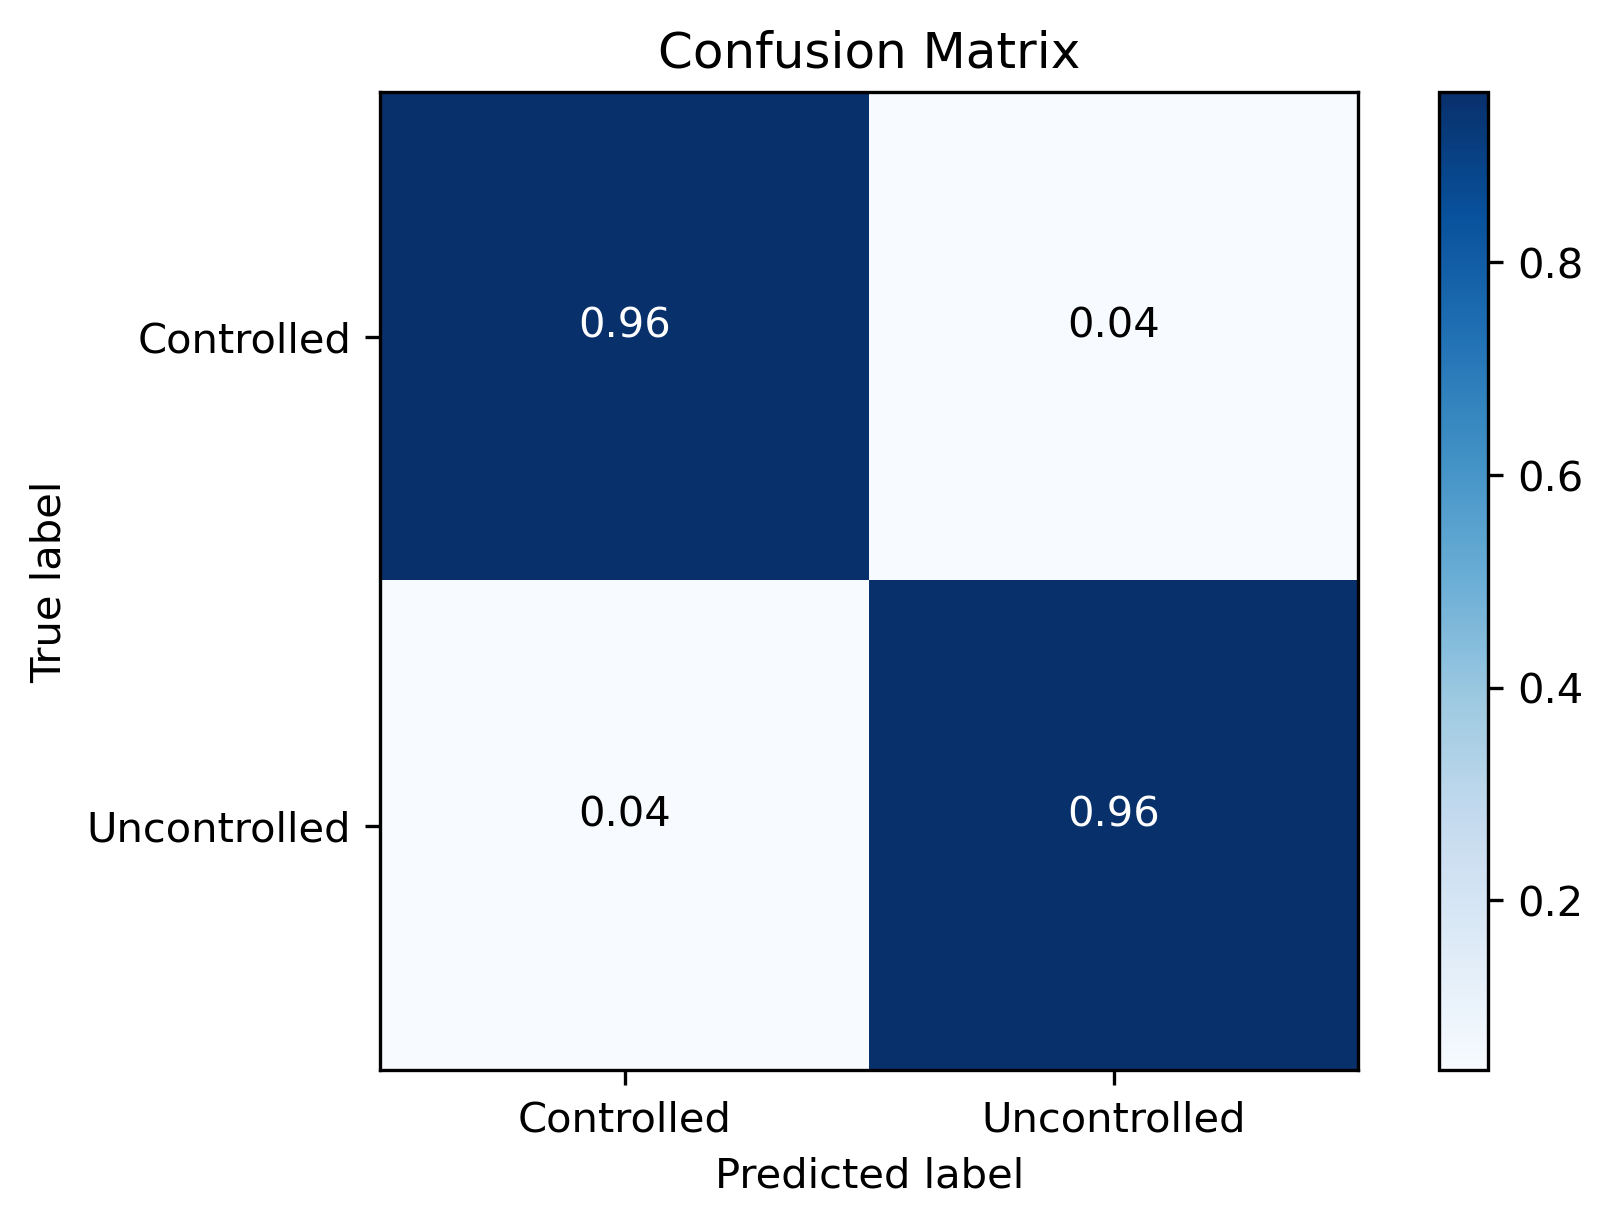

In [24]:
Y_pred_ensemble_lr = (Y_pred_a + Y_pred_b + Y_pred_c)/3
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
y_pred_ensemble_lr = np.argmax(Y_pred_ensemble_lr, axis=1)
# Convert validation observations from one hot vectors to labels
y_true = np.argmax(Y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_ensemble_lr)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_ensemble_lr))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_ensemble_lr ,tpr_ensemble_lr, thresholds_ensemble_lr = roc_curve(Y_test.ravel(), Y_pred_ensemble_lr.ravel())

# Compute ROC area
roc_auc_ensemble_lr = auc(fpr_ensemble_lr, tpr_ensemble_lr)
print('ROC area is {0}'.format(roc_auc_ensemble_lr))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5091
           1       0.96      0.96      0.96      5026

    accuracy                           0.96     10117
   macro avg       0.96      0.96      0.96     10117
weighted avg       0.96      0.96      0.96     10117

ROC area is 0.9905959227322036


In [ ]:
###   ensemble model based on three different models

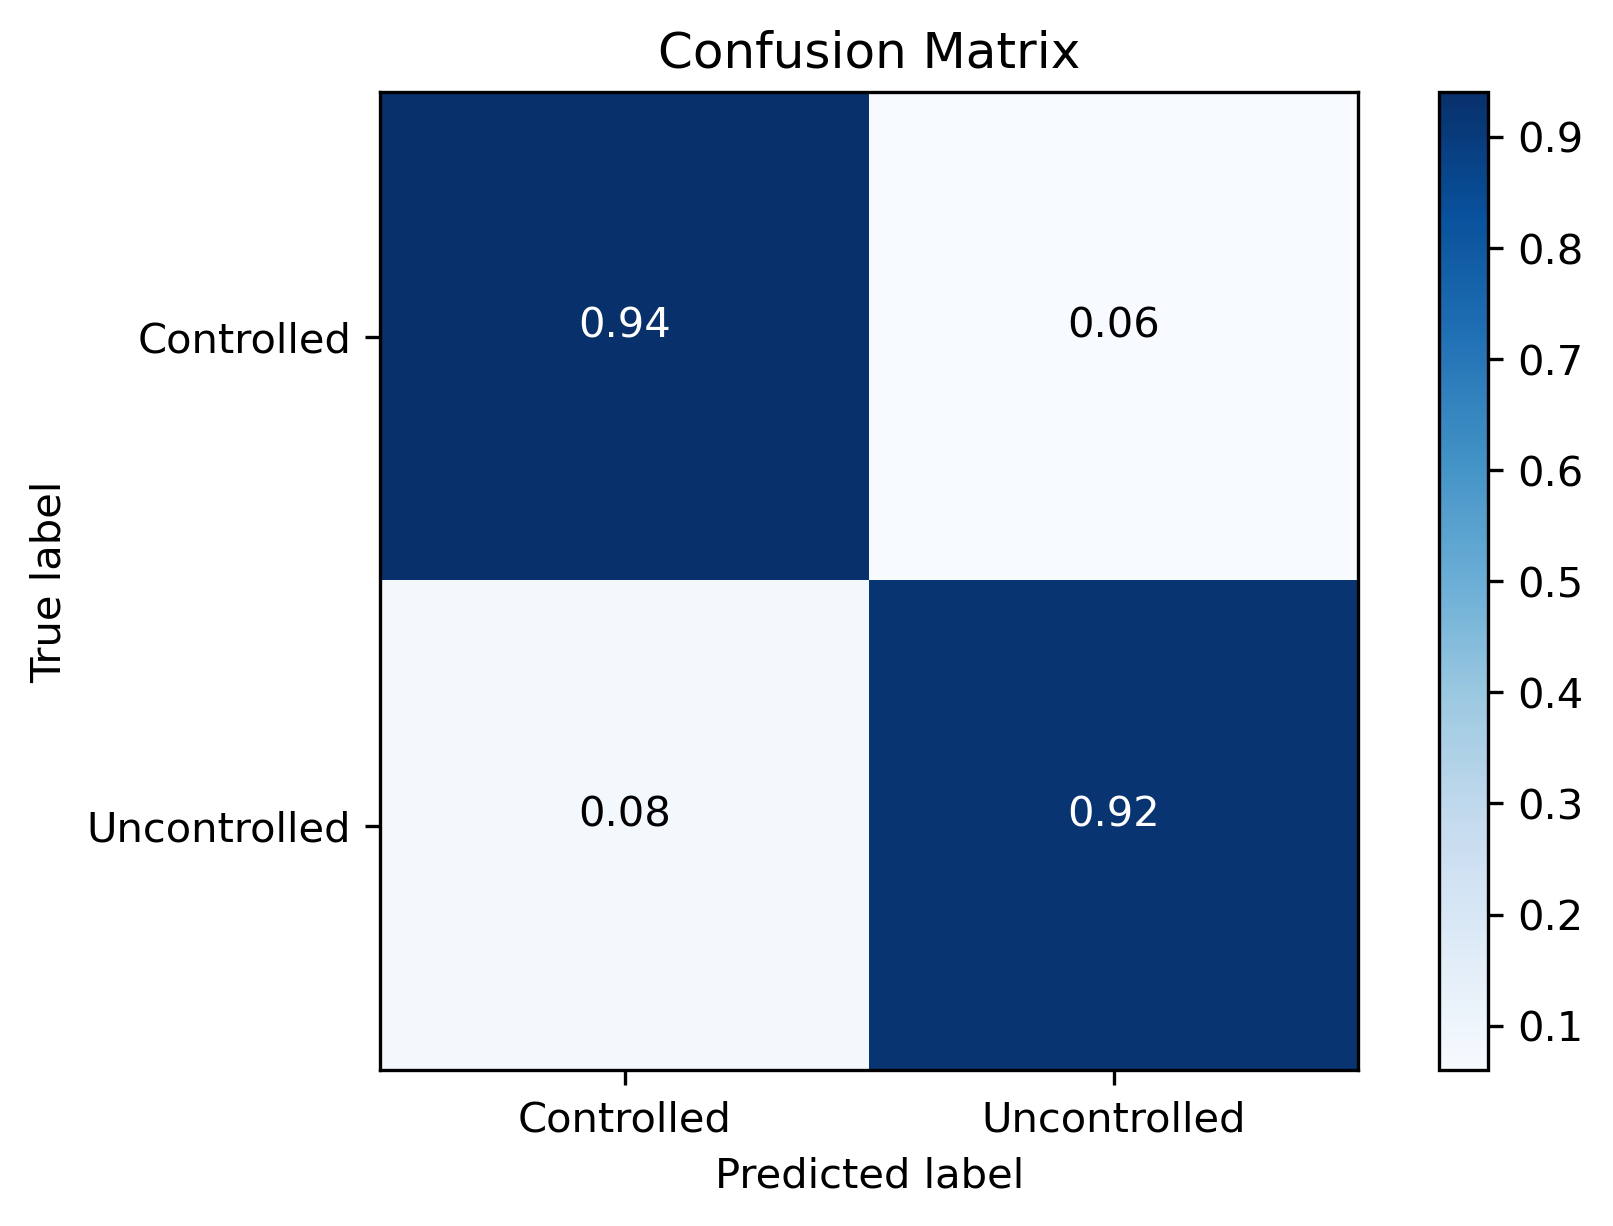

In [26]:
Y_pred_ensemble_model = (Y_pred_a + Y_pred_d + Y_pred_e)/3
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
y_pred_ensemble_model = np.argmax(Y_pred_ensemble_model, axis=1)
# Convert validation observations from one hot vectors to labels
y_true = np.argmax(Y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_ensemble_model)
# plot the confusion matrix

con_mat_norm = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]     # Normalization
con_mat_norm = np.around(con_mat_norm, decimals=2)

plot_confusion_matrix(con_mat_norm, classes=['Controlled','Uncontrolled'])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(y_true, y_pred_ensemble_model))

    
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr_ensemble_model ,tpr_ensemble_model, thresholds_ensemble_model = roc_curve(Y_test.ravel(), Y_pred_ensemble_model.ravel())

# Compute ROC area
roc_auc_ensemble_model = auc(fpr_ensemble_model, tpr_ensemble_model)
print('ROC area is {0}'.format(roc_auc_ensemble_model))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5091
           1       0.94      0.92      0.93      5026

    accuracy                           0.93     10117
   macro avg       0.93      0.93      0.93     10117
weighted avg       0.93      0.93      0.93     10117

ROC area is 0.979506043988312


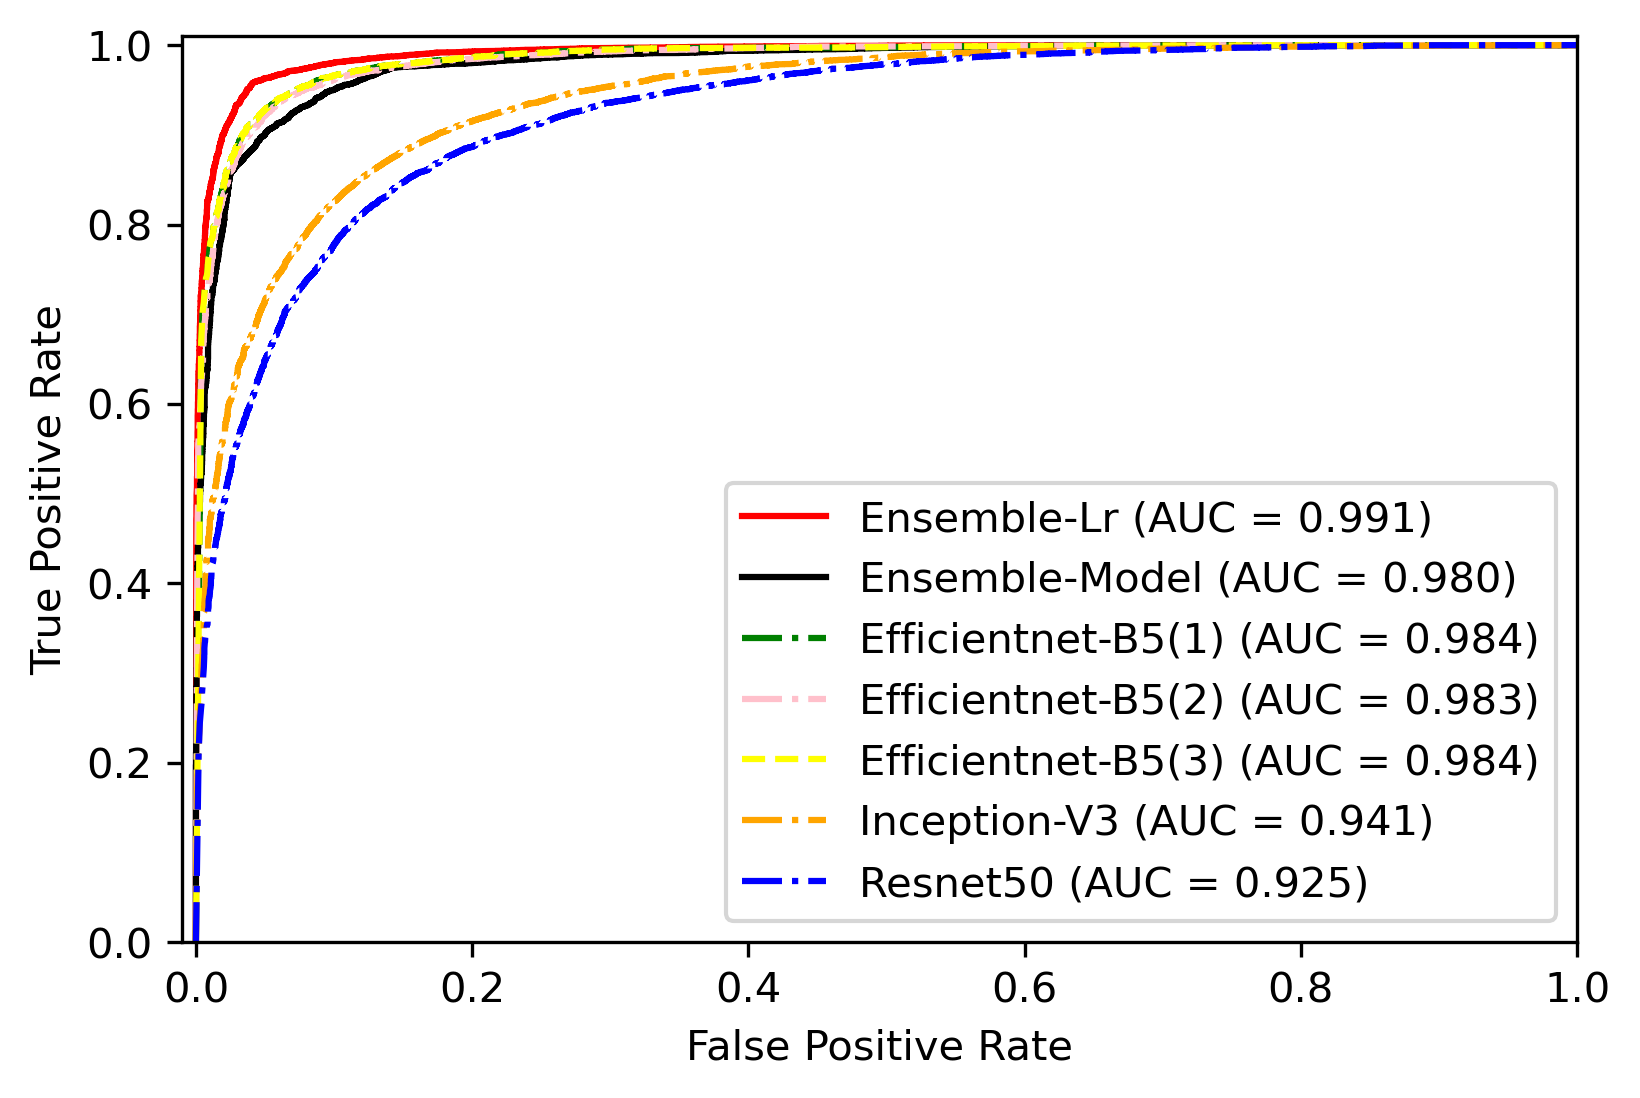

In [28]:
plt.figure()
plt.plot(fpr_ensemble_lr, tpr_ensemble_lr, color='red',linestyle='-', label='Ensemble-Lr (AUC = %0.3f)' % roc_auc_ensemble_lr)
plt.plot(fpr_ensemble_model, tpr_ensemble_model, color='black',linestyle='-', label='Ensemble-Model (AUC = %0.3f)' % roc_auc_ensemble_model)
plt.plot(fpr_a, tpr_a, color='green', linestyle='-.',label='Efficientnet-B5(1) (AUC = %0.3f)' % roc_auc_a)
plt.plot(fpr_b, tpr_b, color='pink',linestyle='-.', label='Efficientnet-B5(2) (AUC = %0.3f)' % roc_auc_b)
plt.plot(fpr_c, tpr_c, color='yellow',linestyle='--', label='Efficientnet-B5(3) (AUC = %0.3f)' % roc_auc_c)
plt.plot(fpr_d, tpr_d, color='orange',linestyle='-.', label='Inception-V3 (AUC = %0.3f)' % roc_auc_d)
plt.plot(fpr_e, tpr_e, color='blue',linestyle='-.', label='Resnet50 (AUC = %0.3f)' % roc_auc_e)
#plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc="lower right")